## Test des paramètres à 100 items

In [44]:
from tools.testor import *
import tools.parser as parser
from tools.SadObject import *
import tools.tabou2_solver as tbs
from tools.Other_solver import Other_solver
from tools.MyIterator import *


### Load les fichiers

In [45]:
sad1 = parser.loadFromFile("Data/pi-12-100-1000-001.kna")
sad2 = parser.loadFromFile("Data/pi-13-100-1000-001.kna")
sad3 = parser.loadFromFile("Data/pi-15-100-1000-001.kna")

loading file: 100%|██████████| 100/100 [00:00<00:00, 143klines/s]


loading file: 100%|██████████| 100/100 [00:00<00:00, 192klines/s]


### Trouver la valeur optimale

In [46]:
solver = Other_solver(sad1)
sol_opti1,_ = solver.solve()

solver = Other_solver(sad2)
sol_opti2,_ = solver.solve()

solver = Other_solver(sad3)
sol_opti3,_ = solver.solve()

print("les solutions optimales sont")
print("sad 1 :",sol_opti1,"pour",sad1.name)
print("sad 2 :",sol_opti2,"pour",sad2.name)
print("sad 3 :",sol_opti3,"pour",sad3.name)

les solutions optimales sont
sad 1 : 970 pour pi-12-100-1000-001.kna
sad 2 : 1989 pour pi-13-100-1000-001.kna
sad 3 : 1011 pour pi-15-100-1000-001.kna


### Pour la liste Tabu

Voici les différents paramètres amenés à évoluer :
-    iter_max : Nombre maximum d'itération de la boucle du solver 
-    tabu_size : Taille de la liste tabu
-   max_weight : si =1, on essaye de trouver une solution inférieur à la capacité. Si c'est 2, 2 fois la capacité, etc.
- def_sol_size : rapport entre la capactié du sac à dos et le poids de la solution initiale (0.5, moitié de la capacité)

#### Initialisation des paramètres

In [47]:
iter_max = 600
tabu_size = 20
comptage_negatif = 3.0
init_size = 0.1

group_size = 25 #nombre de tests de chaque paramètres dans une éxecutions.

#### Test taille TABU

calcul: 100%|██████████| 21/21 [00:07<00:00,  2.64batch/s]


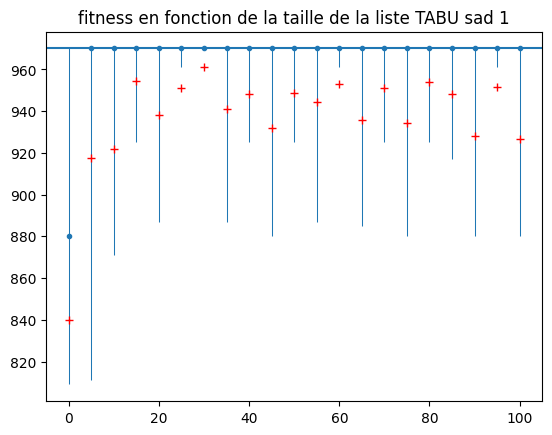

calcul: 100%|██████████| 21/21 [00:07<00:00,  2.78batch/s]


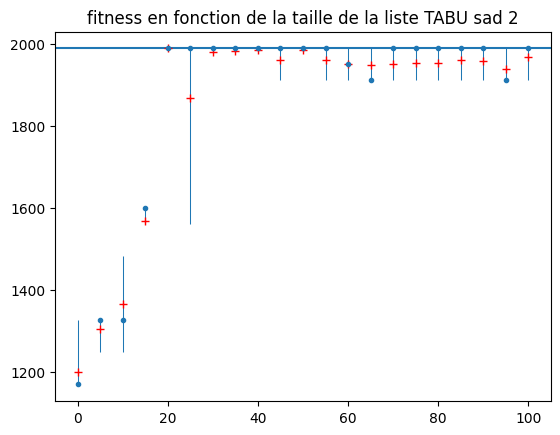

calcul: 100%|██████████| 21/21 [00:07<00:00,  2.97batch/s]


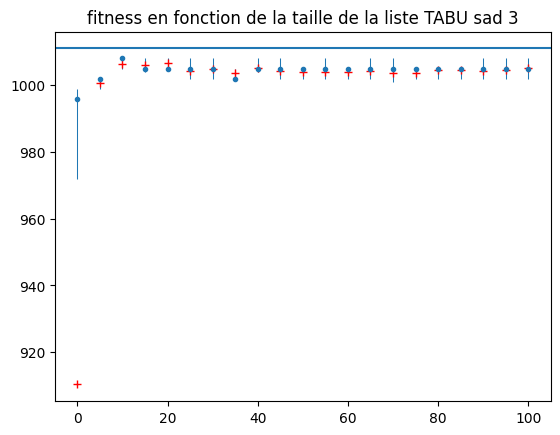

In [48]:
(variateur,title) = tbs.variateur_tabou2.liste_tabou2()

test = Testor(tbs.tabou2_solver(sad1,iter_max,tabu_size,comptage_negatif,init_size))
testResult = test.test(range(0,101,5),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou2_solver(sad2,iter_max,tabu_size,comptage_negatif,init_size))
testResult = test.test(range(0,101,5),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou2_solver(sad3,iter_max,tabu_size,comptage_negatif,init_size))
testResult = test.test(range(0,101,5),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


Pour le premier sac à dos  : 
croissance jusqu'à 10 et à partir de 15 c'est pas mal

Pour le second :
On a une croissance régulière jusqu'à 25, et à partir de 30 c'est bon (et 20 est très sympa)

Pour le troisième :
à partir de 15 ça passe

bref, tout le monde est content avec 20.

## test suivant : nombre d'itérations max

In [ ]:
tabu_size_1 = 30
tabu_size_23 = 20

calcul: 100%|██████████| 20/20 [00:06<00:00,  3.22batch/s]


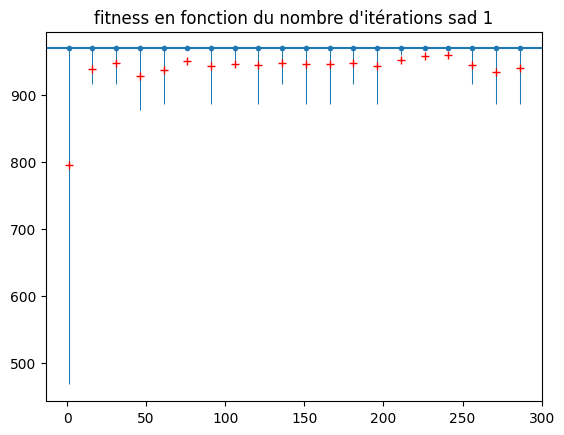

calcul: 100%|██████████| 20/20 [00:06<00:00,  3.14batch/s]


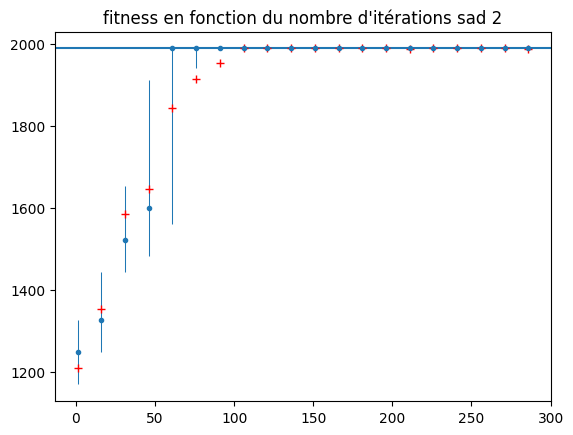

calcul: 100%|██████████| 20/20 [00:05<00:00,  3.44batch/s]


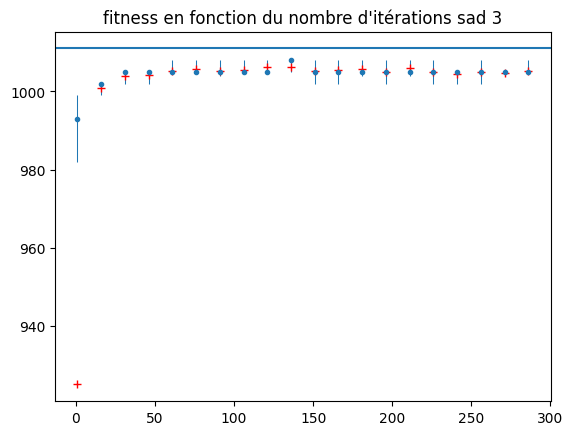

In [ ]:
(variateur,title) = tbs.variateur_tabou2.nombre_iterations()

test = Testor(tbs.tabou2_solver(sad1,iter_max,tabu_size_1,comptage_negatif,init_size))
testResult = test.test(range(1,300,15),variateur,group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou2_solver(sad2,iter_max,tabu_size_23,comptage_negatif,init_size))
testResult = test.test(range(1,300,15),variateur,group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")

test = Testor(tbs.tabou2_solver(sad3,iter_max,tabu_size_23,comptage_negatif,init_size))
testResult = test.test(range(1,300,15),variateur,group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


sac 1 : + de 10, c'est bon

sac 2 : croissance jusq'à 100 où le résultat optimal est toujours trouvé

sac 3 : croissance jusqu'à 50 puis stable

Pour tout le monde 150 est ok

## Le poids... du poids supplémentaire

In [57]:
iter_max = 150
tabu_size_1 = 30
tabu_size_23 = 20

calcul: 100%|██████████| 27/27 [00:06<00:00,  3.93batch/s]


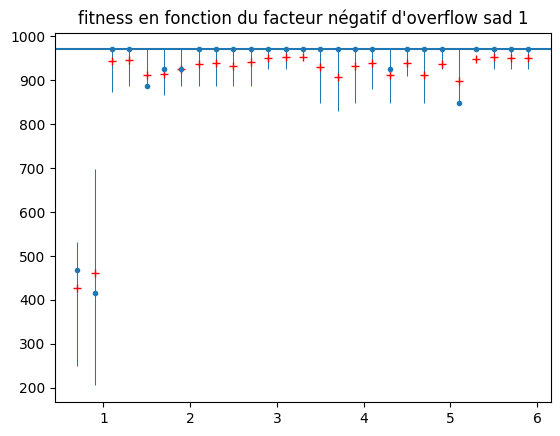

calcul: 100%|██████████| 27/27 [00:06<00:00,  3.95batch/s]


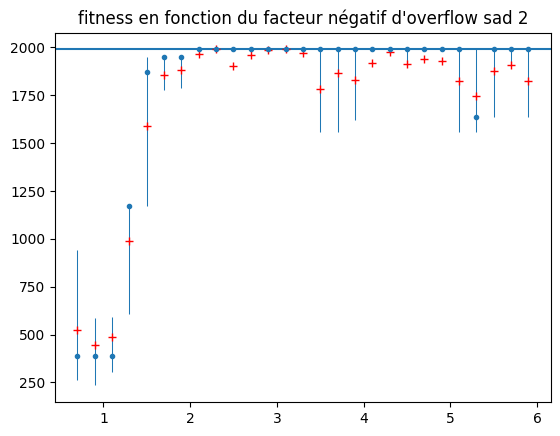

calcul: 100%|██████████| 27/27 [00:07<00:00,  3.48batch/s]


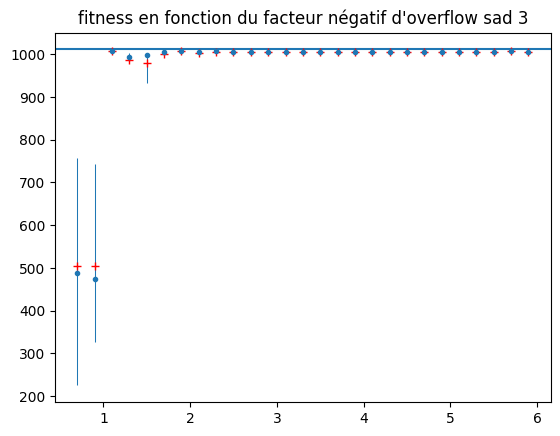

In [58]:
iterateur = floatRange(0.7,6.0,0.2) #on va tester entre 0.1 et 2.0 avec un pas de 0.1

#on donne une taille initiale très faible pour mieux observer l'impacte du poids max accepté
solver = tbs.tabou2_solver(sad1,iter_max,tabu_size_1,0,init_size)

(var,titre) = tbs.variateur_tabou2.compte_negatif_des_points()
testResult = Testor(solver).test(iterateur,var,group_size)
graph_test_result(testResult ,sol_opti1,titre+ " sad 1")

solver = tbs.tabou2_solver(sad2,iter_max,tabu_size_23,0,init_size)
testResult = Testor(solver).test(iterateur,var,group_size)
graph_test_result(testResult,sol_opti2,titre + " sad 2")

solver = tbs.tabou2_solver(sad3,iter_max,tabu_size_23,0,init_size)
testResult = Testor(solver).test(iterateur,var,group_size)
graph_test_result(testResult,sol_opti3,titre + " sad 3")



Pour le premier : plus que 1 c'est bon

pour le second : entre 2 et 3, ça a l'air pas mal.

pour le 3ième : au delà de 2, ça a l'air bon

2.5 convient à tous (la moitié des solutions trouvées sont parfaites ou quasi parfaites)

## variation de la taille de la solution initiale

In [53]:
comptage_negatif = 2.5

calcul: 100%|██████████| 19/19 [00:05<00:00,  3.77batch/s]


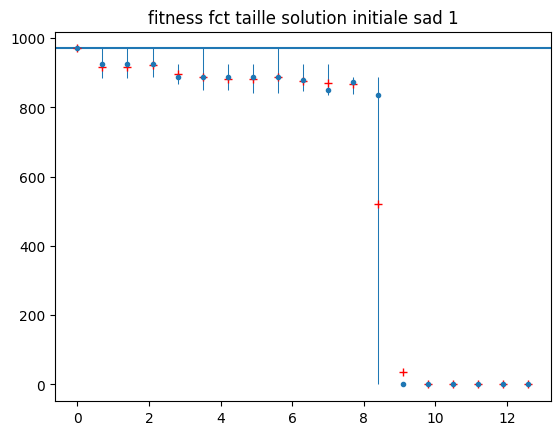

calcul: 100%|██████████| 22/22 [00:06<00:00,  3.50batch/s]


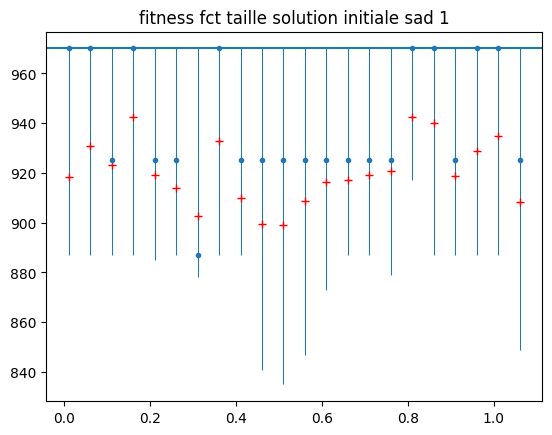

calcul: 100%|██████████| 19/19 [00:05<00:00,  3.53batch/s]


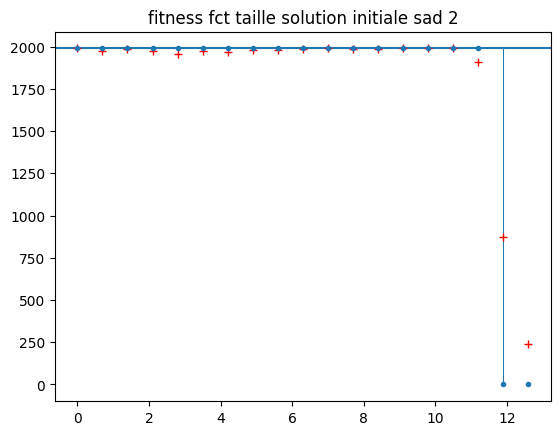

calcul: 100%|██████████| 22/22 [00:06<00:00,  3.62batch/s]


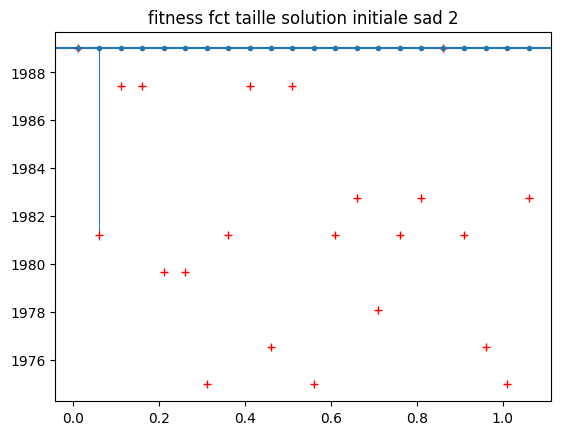

calcul: 100%|██████████| 19/19 [00:06<00:00,  3.10batch/s]


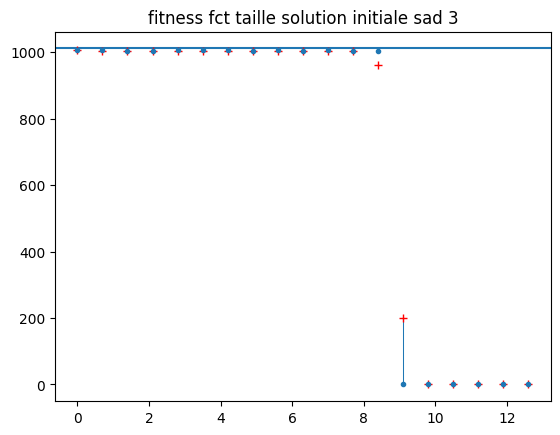

calcul: 100%|██████████| 22/22 [00:06<00:00,  3.46batch/s]


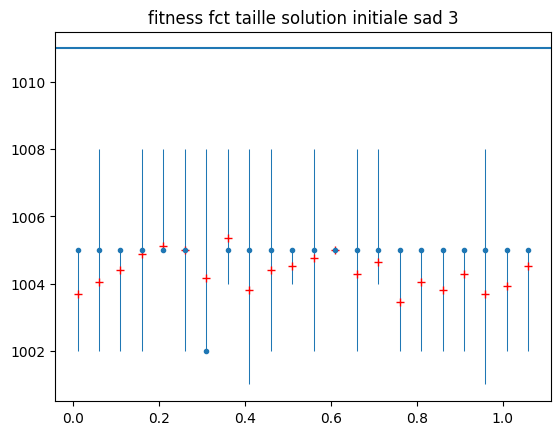

In [54]:
(variateur,title) = tbs.variateur_tabou2.poids_inital()
iterateur = floatRange(0,13,0.7)
closeIter = floatRange(0.01,1.1,0.05)
test = Testor(tbs.tabou2_solver(sad1,iter_max,tabu_size,comptage_negatif,init_size))
testResult = test.test(iterateur,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti1,title + " sad 1")

test = Testor(tbs.tabou2_solver(sad2,iter_max,tabu_size,comptage_negatif,init_size))
testResult = test.test(iterateur,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti2,title + " sad 2")


test = Testor(tbs.tabou2_solver(sad3,iter_max,tabu_size,comptage_negatif,init_size))
testResult = test.test(iterateur,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")
testResult = test.test(closeIter,variateur,group_size=group_size)
graph_test_result(testResult,sol_opti3,title + " sad 3")


Ce qui a l'air le mieux avec ces solutions initiales, c'est de prendre 0 comme valeur et de laisser l'algorithme trouver la solution... mais on ne le fait pas pour avoir des solutions différentes d'une itértation sur l'autre, donc une valeur comme 0.01 est plutôt bien (on récupère un item, qui fait directement dépasser la barrière)

### paramètres Optimaux :

In [55]:
iter_max = 200 # on récupère le résultat précédent
tabu_size = 60

comptage_negatif = 2.5
taille_init = 0.001 #1 item